In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of x_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


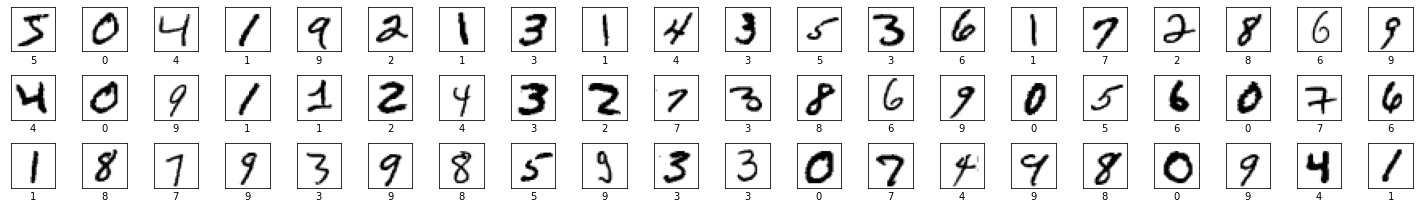

In [3]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [42]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

In [43]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 64)              

In [44]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss= tf.keras.losses.sparse_categorical_crossentropy, 
    metrics=['accuracy']
)

In [46]:
h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0575 - val_accuracy: 0.9860
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.0493 - val_accuracy: 0.9879
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.0506 - val_accuracy: 0.9881
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.0763 - val_accuracy: 0.9793
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0489 - val_accuracy: 0.9893


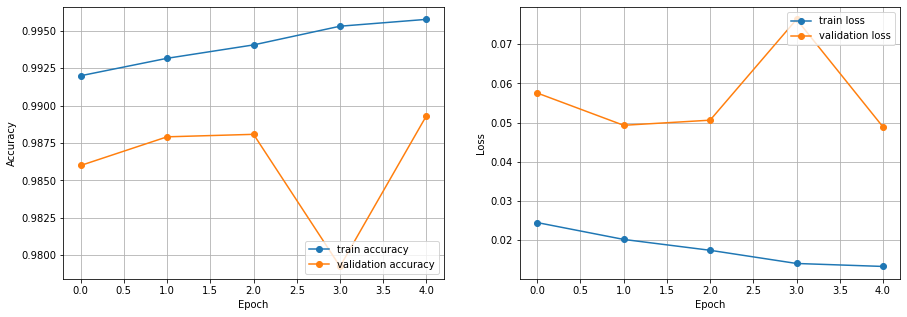

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [49]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0419 - accuracy: 0.9896

Test Accuracy: 0.9896000027656555

Test Loss: 0.04190055653452873


In [50]:
predictions = model.predict(x_test)

In [51]:
predictions[0]

array([3.0003441e-13, 3.9907141e-07, 5.8515206e-09, 9.8355928e-09,
       8.6463867e-09, 1.8191455e-12, 5.0830329e-14, 9.9999964e-01,
       6.4065936e-12, 1.5205577e-10], dtype=float32)

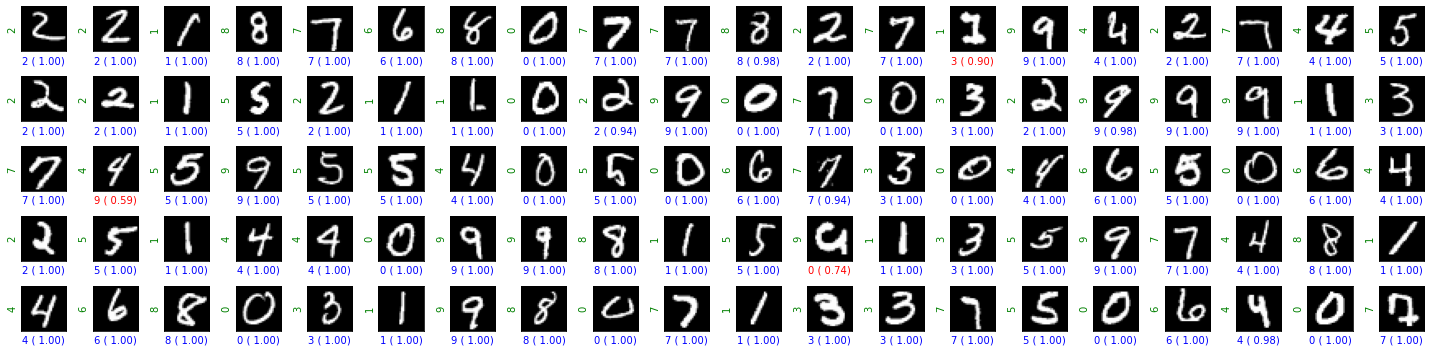

In [57]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [58]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(), 
    loss= tf.keras.losses.sparse_categorical_crossentropy, 
    metrics=['accuracy']
)

In [59]:
h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0412 - val_accuracy: 0.9914
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0412 - val_accuracy: 0.9912
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0414 - val_accuracy: 0.9916
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0416 - val_accuracy: 0.9920
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0420 - val_accuracy: 0.9915


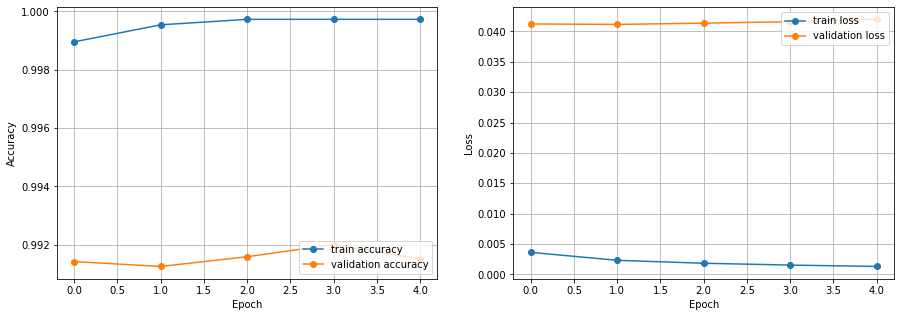

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [61]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9929

Test Accuracy: 0.992900013923645

Test Loss: 0.03845653310418129


In [62]:
predictions = model.predict(x_test)
predictions[0]

array([2.38803766e-15, 1.56425528e-09, 1.37560296e-10, 4.54369764e-10,
       7.53097168e-11, 1.01283524e-13, 5.07892020e-16, 1.00000000e+00,
       1.86574711e-14, 6.70578697e-12], dtype=float32)

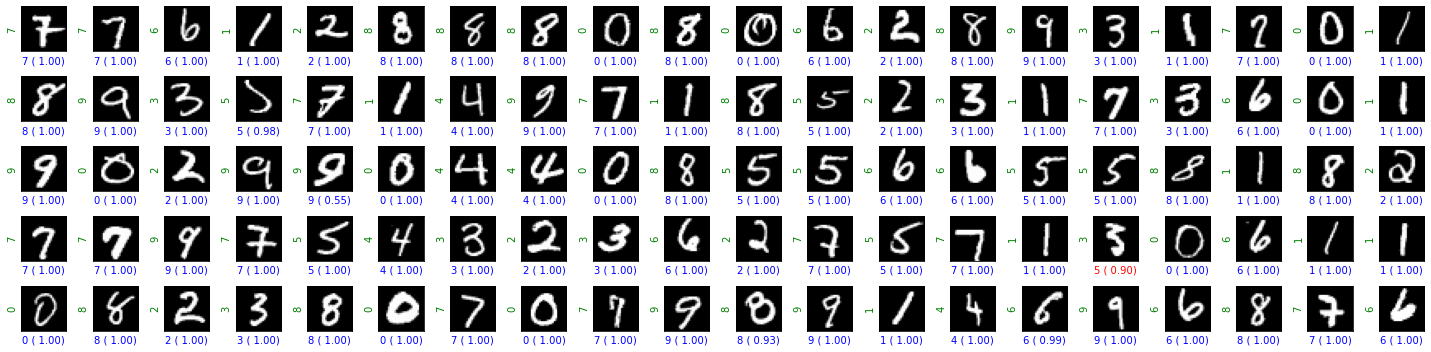

In [63]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [66]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(), 
    loss= tf.keras.losses.sparse_categorical_crossentropy, 
    metrics=['accuracy']
)

In [67]:
h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0589 - val_accuracy: 0.9912
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.0707 - val_accuracy: 0.9908
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0942 - val_accuracy: 0.9888
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0829 - val_accuracy: 0.9907
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.1039 - val_accuracy: 0.9886


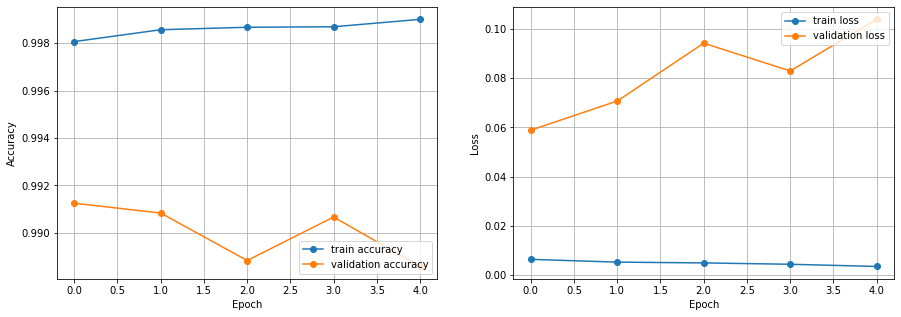

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [69]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0995 - accuracy: 0.9889

Test Accuracy: 0.9889000058174133

Test Loss: 0.09949786961078644


In [70]:
predictions = model.predict(x_test)
predictions[0]

array([4.8339921e-29, 6.0697553e-22, 6.8304452e-24, 2.4429686e-25,
       2.0565053e-23, 2.1604248e-24, 6.5729016e-34, 1.0000000e+00,
       7.8189329e-32, 2.5101945e-23], dtype=float32)

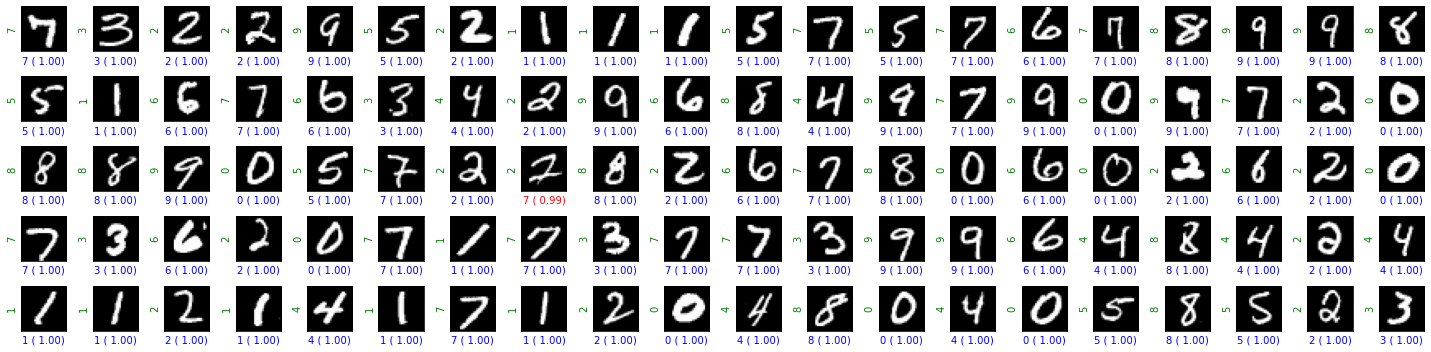

In [71]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()